# LogLoss & AUC

In [1]:
from IPython.display import Image

# Quel contexte en ML

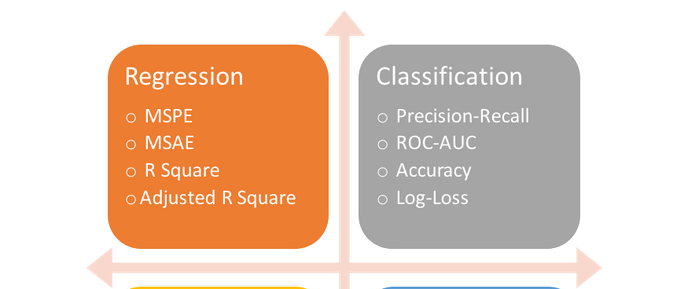

In [2]:
Image("lglAuc.png")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

# AUC rappel et concept

![cm](cm.png)


![roc](roc.png)

**1/ Recall or Sensitivity or TPR (True Positive Rate):**   
$TPR = \frac{TP}{(TP+FN)}$  
*Number of items correctly identified as positive out of total true positives*  

**2/ Specificity or TNR (True Negative Rate):**  
$TNR = \frac{TN}{(TN+FP)}$  
*Number of items correctly identified as negative out of total negatives*

**3/ False Positive Rate or Type I Error**  
$FPR = \frac{FP}{(FP+TN)}$  
*Number of items wrongly identified as positive out of total true negatives*

**4/ False Negative Rate or Type II Error:**  
$FNR = \frac{FN}{(FN+TP)}$  
*Number of items wrongly identified as negative out of total true positives*


# LogLoss rappel et concept

$LogLoss = -\frac{1}{n}\sum_{i=1}^n [y_ilog(\hat{y}_i)+(1-y_i)log(1- \hat{y}_i)]$


![lgl](lgl.png)

# Quelle relation entre LogLoss et AUC ?  
Une étude empirique

![cmd](reg2.PNG)

# Generation de dataset de classification

In [5]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

## Make Circles

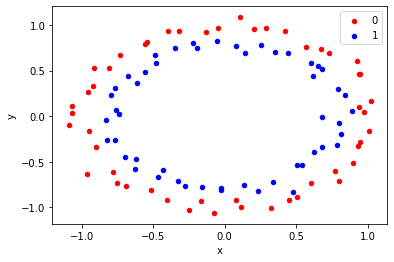

In [6]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [7]:
df.describe()

,x,y,label
count,100.000000,100.000000,100.000000
mean,0.003859,-0.004074,0.500000
std,0.653235,0.646035,0.502519
min,-1.091380,-1.062494,0.000000
25%,-0.617081,-0.616240,0.000000
50%,-0.023040,0.024809,0.500000
75%,0.617020,0.589889,1.000000
max,1.023701,1.086112,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CB5B0FA08>]],
      dtype=object)

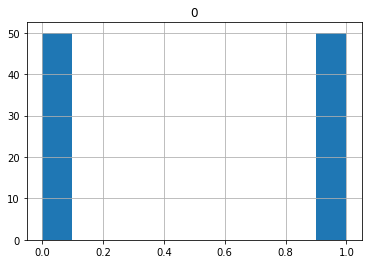

In [8]:
df_y = pd.DataFrame(y)
df_y.hist()

## Make moons

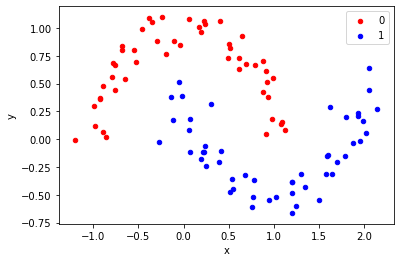

In [9]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [10]:
df.describe()

,x,y,label
count,100.000000,100.000000,100.000000
mean,0.507610,0.254786,0.500000
std,0.885516,0.498569,0.502519
min,-1.207319,-0.658948,0.000000
25%,-0.117736,-0.143120,0.000000
50%,0.517802,0.219175,0.500000
75%,1.138513,0.675882,1.000000
max,2.141912,1.094982,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CB5C445C8>]],
      dtype=object)

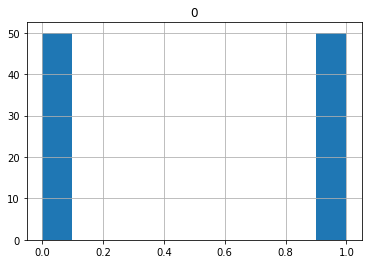

In [11]:
df_y = pd.DataFrame(y)
df_y.hist()

# Les metrics pour evaluer les experiences

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
def StatRegLin (X,y):
    #Correlation
    corr = np.corrcoef(X,y)
    #Regression
    X = X[:,np.newaxis]
    RegLin = LinearRegression ()
    RegLin.fit(X,y)
    y_predict = RegLin.predict (X)
    coef = RegLin.coef_
    r2 = r2_score(y,y_predict)
    intercept = RegLin.intercept_
    
    r2_str = np.array2string (r2, formatter ={'float_kind': lambda x: "%.2f" % x})
    a_str = np.array2string (coef[0], formatter ={'float_kind': lambda x: "%.2f" % x})
    b_str = np.array2string (intercept, formatter ={'float_kind': lambda x: "%.2f" % x})
    corr_str = np.array2string (corr[1,0], formatter ={'float_kind': lambda x: "%.2f" % x})
    
    eq = "y = " + a_str + "x + " + b_str
    R2 = "R2 = " + r2_str
    corr =  "Correlation = "+ corr_str
    
    return  eq, R2, corr

# Simulation de prediction avec random_sample

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CB5EBD5C8>,
      dtype=object)

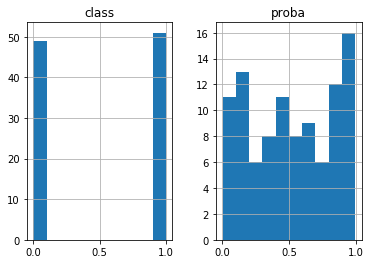

In [14]:
df_y = pd.DataFrame(df_y)
res = pd.DataFrame({"i" : [], "LogLoss" : [], "AUC": [] })

for i in range (1,1000):
    df_prev = pd.DataFrame({'proba': np.random.random_sample(100)})
    df_prev.loc[df_prev['proba'] >= 0.5,'class'] = 1
    df_prev.loc[df_prev['proba'] < 0.5,'class'] = 0
    lgl = log_loss (df_y,df_prev['proba'])
    auc = roc_auc_score(df_y, df_prev['proba'])
    res = res.append({"i" : i, "LogLoss" : lgl, "AUC": auc}, ignore_index = True)

#df_y.hist()
df_prev.hist()

No handles with labels found to put in legend.


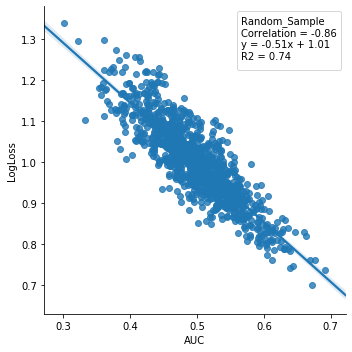

In [15]:
sim ="Random_Sample"
X= res['LogLoss'].copy()
y = res['AUC'].copy()

eq, R2, corr = StatRegLin(X,y)

MyTitle = sim + "\n" + corr+ "\n" + eq + "\n" + R2

g = sns.lmplot(x="AUC", y="LogLoss", data=res)
plt.legend (title = MyTitle)
plt.show(g)

# Simulation de prediction avec random_uniform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CB646E8C8>,
      dtype=object)

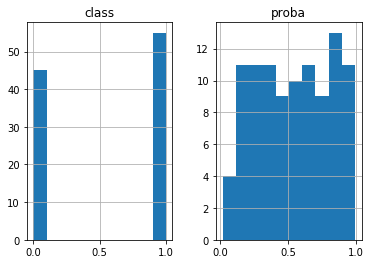

In [16]:
res = pd.DataFrame({"i" : [], "LogLoss" : [], "AUC": [] })

for i in range (1,1000):
    df_prev = pd.DataFrame({'proba': np.random.uniform(0, 1, 100)})
    df_prev.loc[df_prev['proba'] >= 0.5,'class'] = 1
    df_prev.loc[df_prev['proba'] < 0.5,'class'] = 0
    lgl = log_loss (df_y,df_prev['proba'])
    auc = roc_auc_score(df_y, df_prev['proba'])
    res = res.append({"i" : i, "LogLoss" : lgl, "AUC": auc}, ignore_index = True)

#df_y.hist()
df_prev.hist()

No handles with labels found to put in legend.


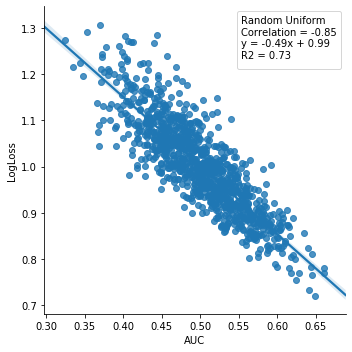

In [17]:
sim ="Random Uniform"
X= res['LogLoss'].copy()
y = res['AUC'].copy()

eq, R2, corr = StatRegLin(X,y)

MyTitle = sim + "\n" + corr+ "\n" + eq + "\n" + R2

g = sns.lmplot(x="AUC", y="LogLoss", data=res)
plt.legend (title = MyTitle)
plt.show(g)

# Simulation de prediction avec random_normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CB65702C8>,
      dtype=object)

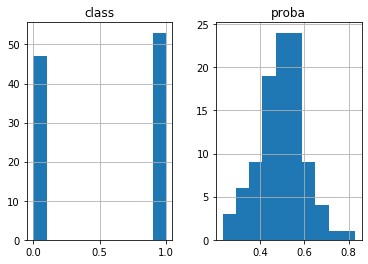

In [18]:
res = pd.DataFrame({"i" : [], "LogLoss" : [], "AUC": [] })

for i in range (1,1000):
    df_prev = pd.DataFrame({'proba': np.random.normal(0.5, 0.1, 100)})
    df_prev.loc[df_prev['proba'] >= 0.5,'class'] = 1
    df_prev.loc[df_prev['proba'] < 0.5,'class'] = 0
    lgl = log_loss (df_y,df_prev['proba'])
    auc = roc_auc_score(df_y, df_prev['proba'])
    res = res.append({"i" : i, "LogLoss" : lgl, "AUC": auc}, ignore_index = True)

#df_y.hist()
df_prev.hist()

No handles with labels found to put in legend.


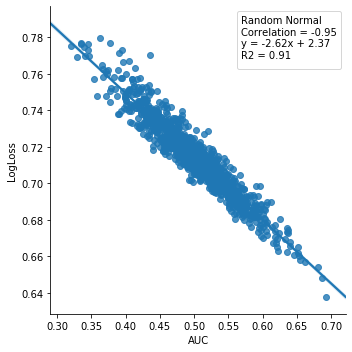

In [19]:
sim ="Random Normal"
X= res['LogLoss'].copy()
y = res['AUC'].copy()

eq, R2, corr = StatRegLin(X,y)

MyTitle = sim + "\n" + corr+ "\n" + eq + "\n" + R2

g = sns.lmplot(x="AUC", y="LogLoss", data=res)
plt.legend (title = MyTitle)
plt.show(g)


# Recap des resultats

```
              Prevision   Prevision	Prevision
              Random      Random       Random
              Sample 	 Uniform	  Normal
Correlation   -0,87	  -0,86	     -0,96
Pente (eq)	-0,49	  -0,50	     -2,61
R2	         0,76	   0,74	      0,91
```

# Résumé : comparaison et avantage

AUC
* Maximisation de l’AUC 

* **Invariante échelle**. L'AUC mesure la qualité du classement des prédictions.

* **Indépendance par rapport au seuils**. L'AUC  mesure la qualité des précisions du modèle quel que soit le seuil de classification sélectionné.

Log Loss
* Minimisation du  log loss

* **Calibration statistique**. le Log Loss mesure la performance d’un modèle de classification en prenant en compte l’incertitude (probabilité) de la prédiction par rapport à la vraie valeur. 
* Le Log loss est est un metric qui peut s’utiliser lorsque la variables à modéliser est qualitative avec **plus de deux modalités**.

# Limites

AUC
* **L'invariance d'échelle** n'est pas toujours souhaitable. Ex:  nous avons parfois besoin d'obtenir des probabilités calibrées, ce que l'AUC ne permet pas de déterminer. 

* **L'indépendance vis-à-vis des seuils de classification n'est pas toujours souhaitable**. Lorsque des disparités importantes de coût existent entre les faux négatifs et les faux positifs, il peut être essentiel de minimiser l'un des types d'erreur de classification (Spam : minimiser en priorité les faux positifs).

Log Loss
* **Pénalisation sévère en cas de mauvaise prévision**. Une confiance exagérée dans une mauvaise classe à pour conséquence de faire exploser ce critère. Ex, considérons deux prédictions où les prédictions sont respectivement 0,51 et 0,99. Dans le premier cas, le modèle n'est que légèrement confiant de la prédiction de classe (en supposant un seuil de 0,5), tandis que dans le second, il est extrêmement confiant. Si, les deux proba sont faux, la pénalité sera serève. 

# Des ressources pour approfondir

[Veille metrique Matrice de confusion sur Teams](https://teams.microsoft.com/_#/school/files/G%C3%A9n%C3%A9ral?threadId=19%3Ac7585b4ffb5f43dba489bc96ea8ce368%40thread.tacv2&ctx=channel&context=veille-m%25C3%25A9triques%2520de%2520la%2520matrice%2520de%2520confusion&rootfolder=%252Fsites%252FBORDEAUX%252FDocuments%2520partages%252FGeneral%252Fveille-m%25C3%25A9triques%2520de%2520la%2520matrice%2520de%2520confusion)  
[Veille Log Loss sur Github](https://github.com/Simplon-IA-Bdx-1/log-loss-prez)  
1/ http://www.datamachines.io/devrandom/2019/5/22/auc-vs-log-loss  
2/ https://stats.stackexchange.com/questions/235089/optimizing-auc-vs-logloss-in-binary-classification-problems  
3/ https://stackoverflow.com/questions/58610117/comparing-auc-log-loss-and-accuracy-scores-between-models  
4/ https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428  
5/ https://www.kaggle.com/c/adams-faces-ss19/discussion/100507  
6/ https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/  